In [94]:
import sys
import pkg_resources

import numpy as np
import pandas as pd
import scipy as sp
import sklearn as skl

#za prikaz podataka
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score

from sklearn.metrics import v_measure_score
from sklearn.mixture import GaussianMixture

%matplotlib inline

In [95]:
#PROVJERA DAL JE INSTALIRANO SVE DOBRO\n",
print("python ==" + str(sys.version_info) +
      "\nnumpy == " + pkg_resources.get_distribution("numpy").version +
      "\npandas == " + pkg_resources.get_distribution("pandas").version +
      "\nscipy == " + pkg_resources.get_distribution("scipy").version +
      "\nscikit-learn == " + pkg_resources.get_distribution("scikit-learn").version)

python ==sys.version_info(major=3, minor=5, micro=5, releaselevel='final', serial=0)
numpy == 1.16.2
pandas == 0.24.2
scipy == 1.2.1
scikit-learn == 0.20.3


In [96]:
#iscitavanje fajla
df = pd.read_csv("train.csv")

#data se sastoji samo iz d1,d2,d3,d4,d5 kolona
features = ["d1","d2","d3","d4","d5"]
data = df[features]

#true_labes da bi se izracunao m-mean score
true_labels = df['level']

#inicijalizacija i fitovanje EM Gausian Mixture
EM = GaussianMixture(n_components = 4)
EM.fit(data)

#predikcija kojem klasteru pripada koji element
cluster = EM.predict(data)
cluster

array([3, 1, 3, 3, 3, 0, 0, 3, 3, 1, 1, 3, 2, 1, 0, 1, 3, 3, 3, 0, 2, 0,
       0, 3, 2, 1, 3, 3, 2, 1, 0, 3, 2, 1, 0, 3, 3, 3, 3, 3, 2, 0, 0, 3,
       3, 0, 0, 1, 1, 0, 3, 3, 2, 0, 0, 3, 2, 0, 1, 3, 2, 0, 0, 3, 2, 3,
       3, 3, 3, 0, 0, 1, 3, 0, 1, 3, 2, 3, 3, 3, 2, 0, 0, 3, 3, 3, 1, 3,
       3, 0, 0, 2, 3, 3, 1, 3, 2, 1, 0, 3, 3, 1, 0, 3, 3, 0, 0, 0, 2, 1,
       3, 3, 2, 1, 0, 3, 2, 2, 0, 0, 2, 2, 3, 0, 0, 2, 0, 3, 3, 2, 3, 0,
       3, 1, 0, 0, 3, 3, 0, 3, 3, 2, 0, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3,
       0, 0, 0, 1, 0, 0, 3, 2, 1, 1, 3, 1, 0, 1, 3, 1, 3, 0, 1, 3, 0, 3,
       3, 1, 0, 1, 3, 2, 0, 3, 3, 2, 0, 0, 3, 2, 0, 0, 0, 2, 0, 3, 3, 3,
       0, 3, 3, 2, 3, 3, 1, 3, 0, 0, 3, 2, 0, 0, 1, 3, 0, 3, 3, 2, 0, 3,
       3, 3, 0, 0, 3, 2, 0, 3, 1, 1, 0, 3, 3, 2, 0, 3, 3, 1, 0, 0, 3, 1,
       0, 3, 3, 1, 0, 3, 1, 2, 0, 0, 3, 2, 0, 0, 3, 2], dtype=int64)

In [97]:
#true_labels
#silhouette_score(data,cluster)
v_measure_score(true_labels,cluster)

0.5198444714218945

In [98]:
#ako treba probablisticki koliki su procenti da pripada kojem klasteru
EM.predict_proba(data)

array([[1.13384167e-18, 7.08475428e-54, 1.30933536e-23, 1.00000000e+00],
       [1.79317553e-03, 9.98206824e-01, 1.35921236e-34, 3.78969509e-10],
       [1.93488893e-03, 5.78254154e-19, 7.50202279e-17, 9.98065111e-01],
       ...,
       [9.99806428e-01, 1.92271176e-04, 7.29832376e-22, 1.30053346e-06],
       [3.58232685e-05, 2.90215828e-29, 4.56520596e-02, 9.54312117e-01],
       [5.40242632e-13, 1.66480766e-04, 9.99831863e-01, 1.65581457e-06]])

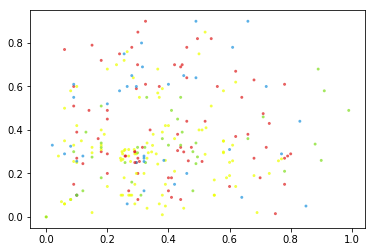

In [99]:
data['cluster'] = cluster

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', "#EEFF00"]
data['clusters'] = data.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

plt.scatter(data.d1, data.d2, c=data.clusters, alpha = 0.6, s=4)